<a href="https://colab.research.google.com/github/Amulya-Anurag/GRIP_Data_Science_Internship/blob/master/GIRP_Task_3_KMean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  # import Relevent Libraries
  
  import warnings
  warnings.filterwarnings('ignore')

  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set()
  from sklearn.cluster import KMeans
  from sklearn import datasets

In [2]:
#Load the data using sklearn datasets
data= datasets.load_iris()

In [3]:
#Create a dataframe 
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#Check for null values
df.isna().sum()

# No null values found

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## How to pick an optimum number of cluster ?

The Elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

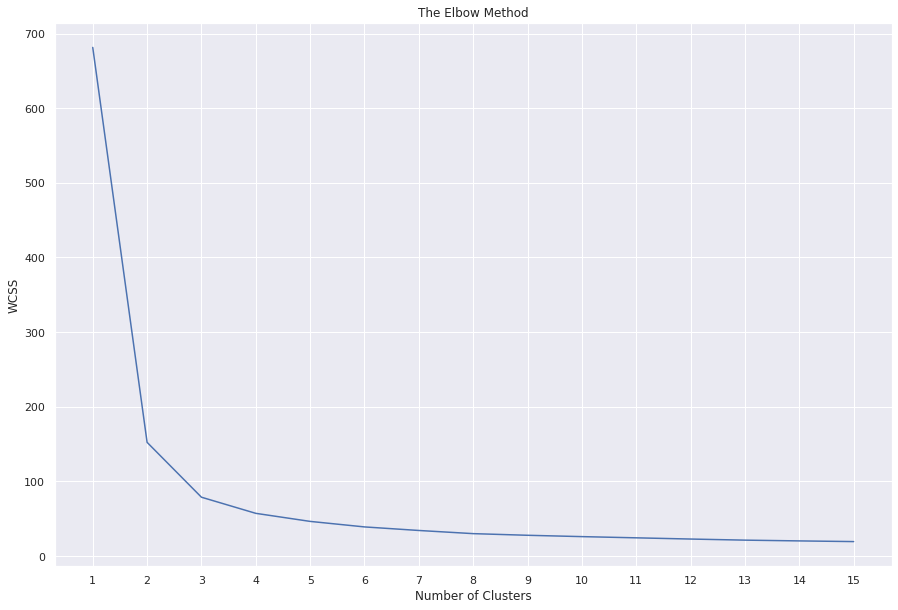

In [5]:
# take the data in numpy array form
x = df.iloc[: , :].values

#create a lidt for wcss
wcss = []

#Check for 15 clusters
for i in range(1,16):
  knn = KMeans(n_clusters=i)
  knn.fit(x)
  wcss.append(knn.inertia_)


#Plot the results
plt.figure(figsize = (15,10))
sns.lineplot(x = range(1,16) , y = wcss)
plt.xticks((range(1,16)))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

Clearly we can see 3 clusters  are giving low wcss and for larger number of clusters there are no significant improvement. Lets Choose 3 clusters

In [6]:
# clusterize using 3 clusters
kmeans = KMeans(3)
kmeans.fit(x)
clusters = kmeans.fit_predict(x)

In [7]:
# Add the results into original dataframe
df['clusters'] = clusters
df['clusters'] = df.clusters.map({1:'Iris-setosa', 0:'Iris-versicolor' , 2:'Iris-virginica' })
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Plot the clusters on the basis of petal length (cm)	petal width (cm)

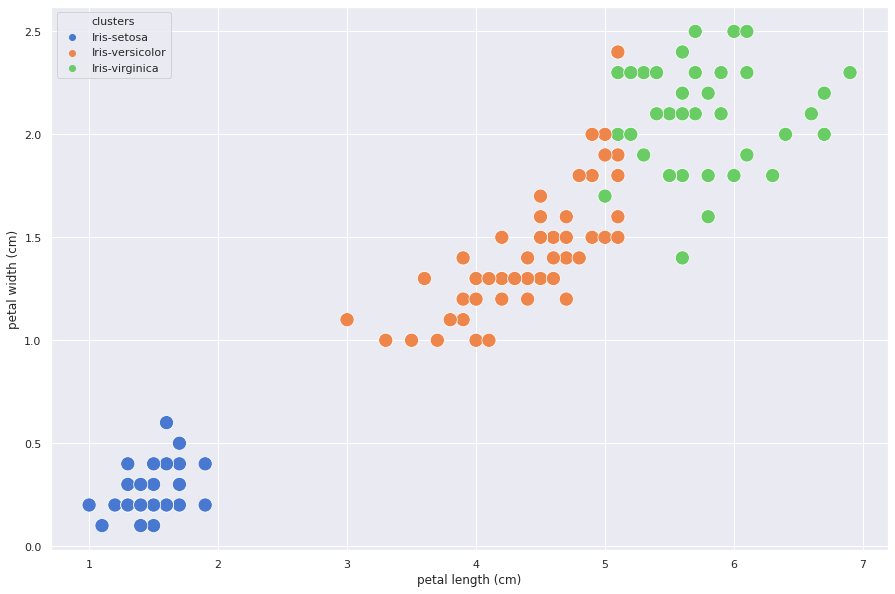

In [8]:
plt.figure(figsize= (15 ,10))
sns.scatterplot( x='petal length (cm)' , y='petal width (cm)' , hue = 'clusters' , data = df, palette= 'muted' ,s = 200  )
plt.show()